In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import astropy
import matplotlib.pyplot as plt

In [2]:
# Time to sweep
t_start = Time('2019-01-01 00:00:00')
t_end = Time('2020-01-01 00:00:00')

# Observer location
ea4gpz = EarthLocation(lat = 40.595865*u.deg, lon = -3.699069*u.deg, height=800*u.m)

# Antenna pointing
azimuth = 137.64*u.deg
elevation = 33.63*u.deg

In [3]:
t_step = 10*u.s
t = t_start + np.arange((t_end-t_start)/t_step)*t_step

dish_pointing = SkyCoord(AltAz(az = azimuth * np.ones(t.size), alt = elevation*np.ones(t.size),\
                               location = ea4gpz, obstime = t))
moon = astropy.coordinates.get_moon(t)
separation = moon.separation(dish_pointing)

In [4]:
events = list()
for s in t[separation < 1*u.deg]:
    if len(events) == 0 or s - events[-1][1] > 10*u.min:
        events.append([s,s])
    else:
        events[-1][1] = s

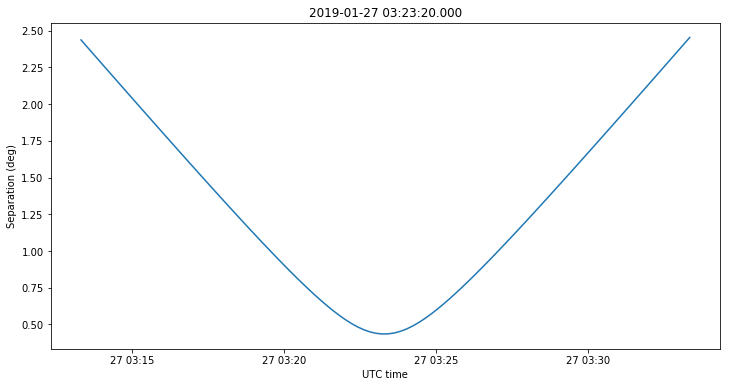

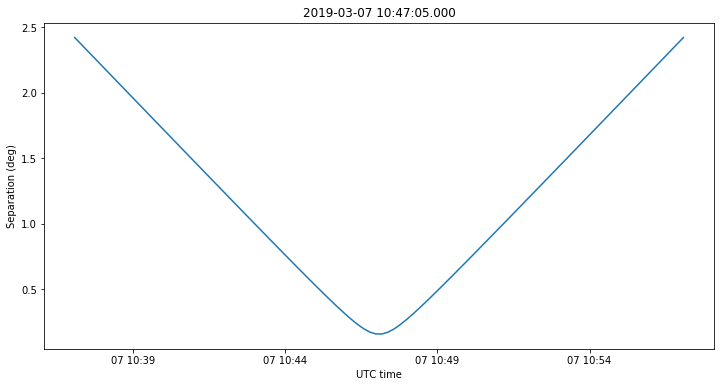

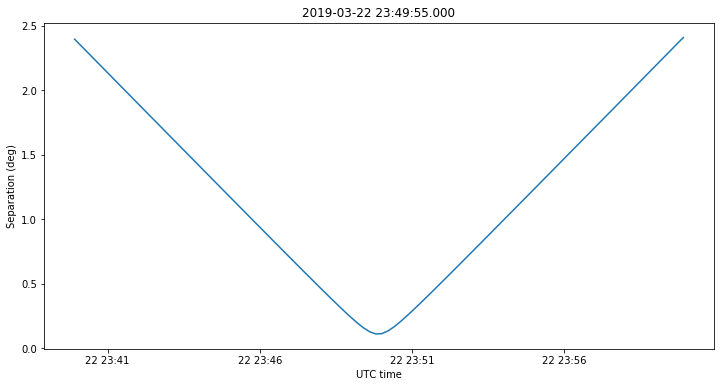

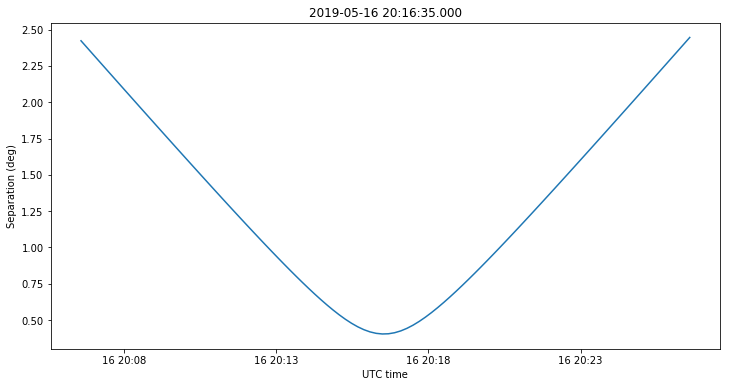

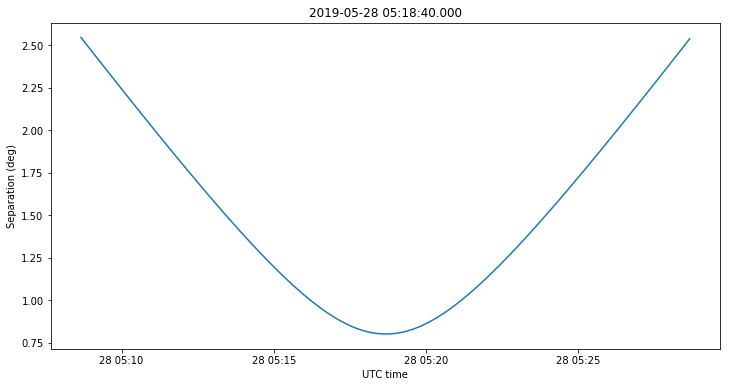

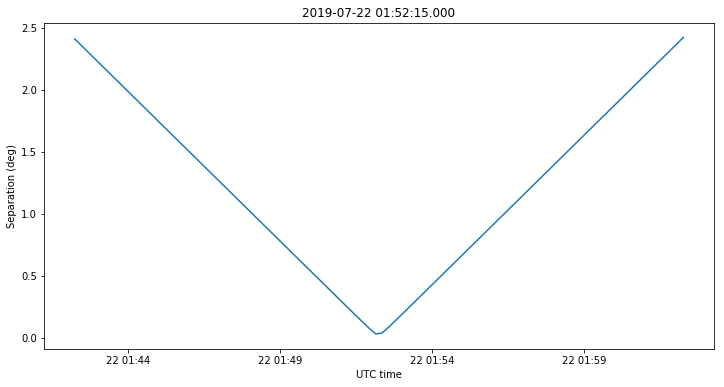

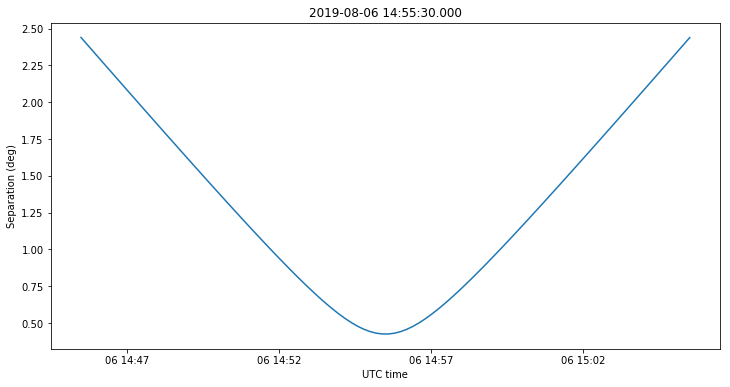

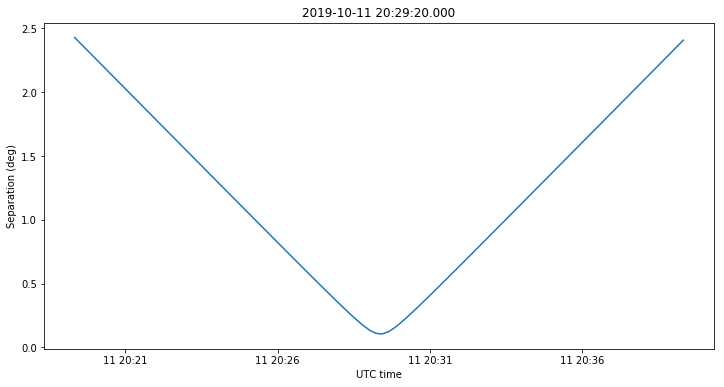

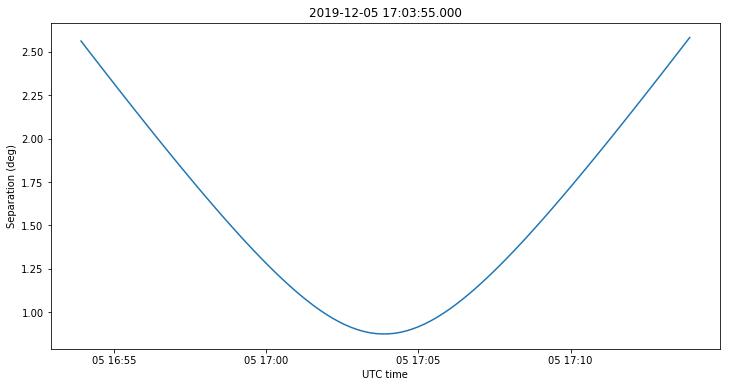

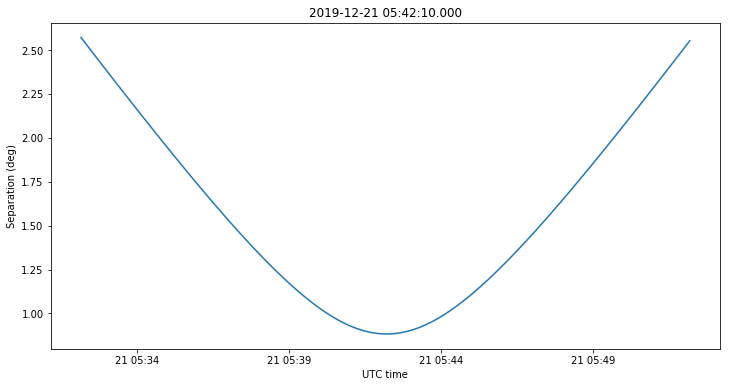

In [5]:
for event in events:
    t0 = event[0] + 0.5*(event[1]-event[0]) 
    time = t0 + np.linspace(-1,1,100) * 10 * u.min
    dish_pointing = SkyCoord(AltAz(az = azimuth * np.ones(time.size), alt = elevation * np.ones(time.size),\
                               location = ea4gpz, obstime = time))
    plt.figure(figsize = (12,6), facecolor = 'w')
    plt.plot(time.datetime, astropy.coordinates.get_moon(time).separation(dish_pointing))
    plt.title(t0)
    plt.xlabel('UTC time')
    plt.ylabel('Separation (deg)')